In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        """
        SVM (Support Vector Machine) Classifier
        
        parameters:-
        learning_rate: Learning rate for gradient descent
        lambda_param: Regularization parameter
        n_iters: Number of iterations for training
        """
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        """
        Train the SVM classifier
        """
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1, 1
        n_samples, n_features = X.shape
        
        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        # Gradient descent optimization
        for _ in range(self.n_iters):
            loss = 0
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                    loss += 0  # No loss for correctly classified points
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]
                    loss += 1  # Loss for misclassified points
            self.losses.append(loss)

    def predict(self, X):
        """
        Predict the class labels for input samples
        """
        linear_output = np.dot(X, self.w) - self.b
        return np.sign(linear_output)


In [73]:
# Generate synthetic data
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)  # Convert labels to -1, 1 for SVM


In [74]:
# Initialize and train the SVM model
clf = SVM()
clf.fit(X, y)

In [75]:
# Split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
# Scale features for better optimization performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
# Make predictions
predictions = clf.predict(X)

In [78]:
# Output model parameters
print("Weights: ", clf.w)
print("Bias: ", clf.b)

Weights:  [0.45631604 0.16243968]
Bias:  -0.10200000000000008


Confusion Matrix:


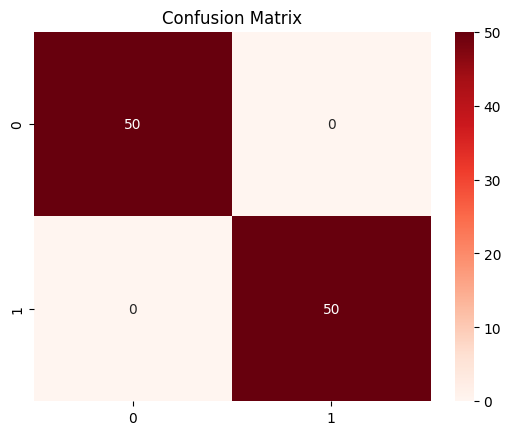

In [80]:
# Performance metrics
print("Confusion Matrix:")
cnf_matrix = confusion_matrix(y, predictions)
sns.heatmap(cnf_matrix, annot=True, fmt='d', cmap="Reds")
plt.title("Confusion Matrix")
plt.show()

In [81]:
print("\nClassification Report:")
print(classification_report(y, predictions))


Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



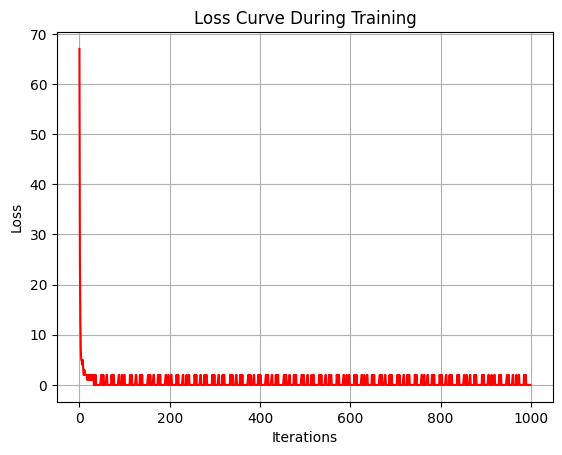

In [82]:
# Plot loss curve
def plot_loss_curve():
    """
    Plot the loss curve during training
    """
    plt.plot(range(len(clf.losses)), clf.losses, label="Loss", color='red')
    plt.title('Loss Curve During Training')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid(True)
    plt.show()

plot_loss_curve()


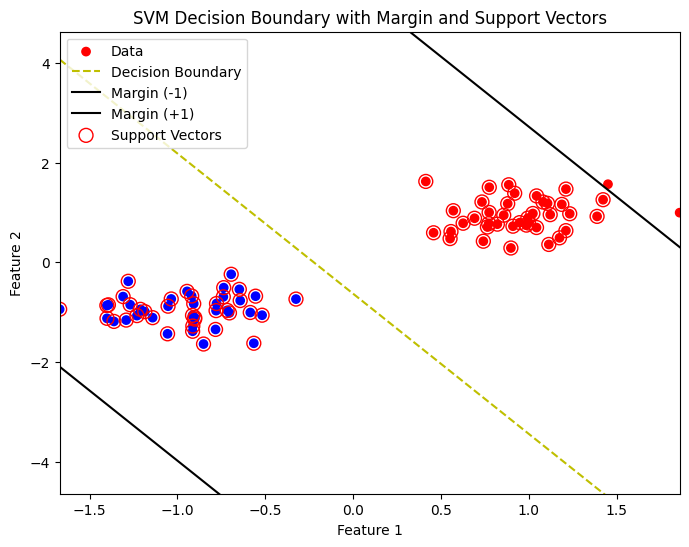

In [83]:
# Visualizing decision boundary and margins
def visualize_svm():
    """
    Visualize the decision boundary of the SVM model
    """
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(1, 1, 1)

    # Scatter plot of the data points
    plt.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, cmap=plt.cm.bwr, label="Data")

    # Define the range of values for plotting the decision boundary
    x0_1 = np.amin(X_train[:, 0])
    x0_2 = np.amax(X_train[:, 0])

    # Hyperplanes
    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)
    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    # Plot decision boundaries and margin lines
    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--', label="Decision Boundary")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k', label="Margin (-1)")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k', label="Margin (+1)")

    # Highlight Support Vectors
    support_vectors = (y_train * (np.dot(X_train, clf.w) - clf.b) < 1)
    ax.scatter(X_train[support_vectors, 0], X_train[support_vectors, 1], s=100, facecolors='none', edgecolors='red', label="Support Vectors")

    # Set axis limits and labels
    ax.set_xlim([x0_1, x0_2])
    ax.set_ylim([np.amin(X_train[:, 1]) - 3, np.amax(X_train[:, 1]) + 3])
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title("SVM Decision Boundary with Margin and Support Vectors")
    plt.legend(loc='upper left')
    plt.show()

visualize_svm()


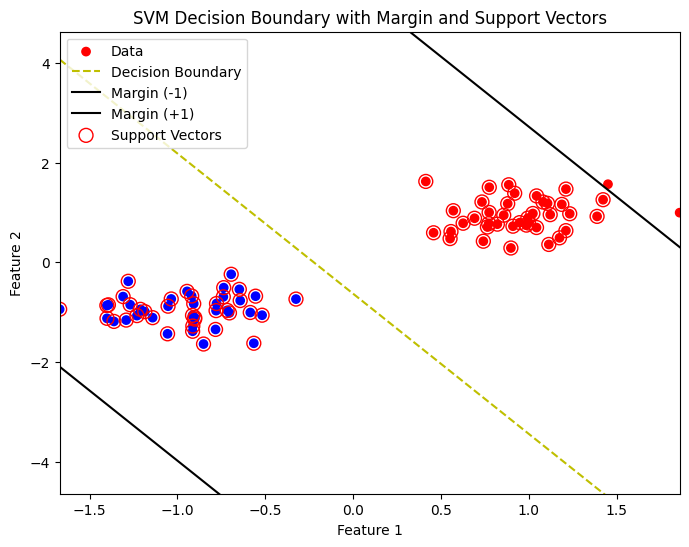

In [67]:
# Visualize the SVM decision boundary and margins
visualize_svm()

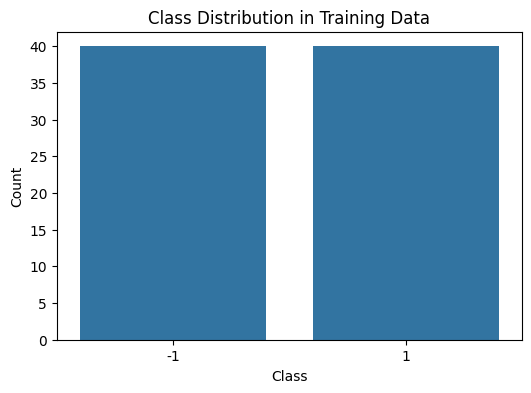

In [84]:
# Class Distribution
def plot_class_distribution():
    """
    Plot the distribution of classes in the dataset
    """
    plt.figure(figsize=(6, 4))
    sns.countplot(x=y_train)
    plt.title("Class Distribution in Training Data")
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

plot_class_distribution()

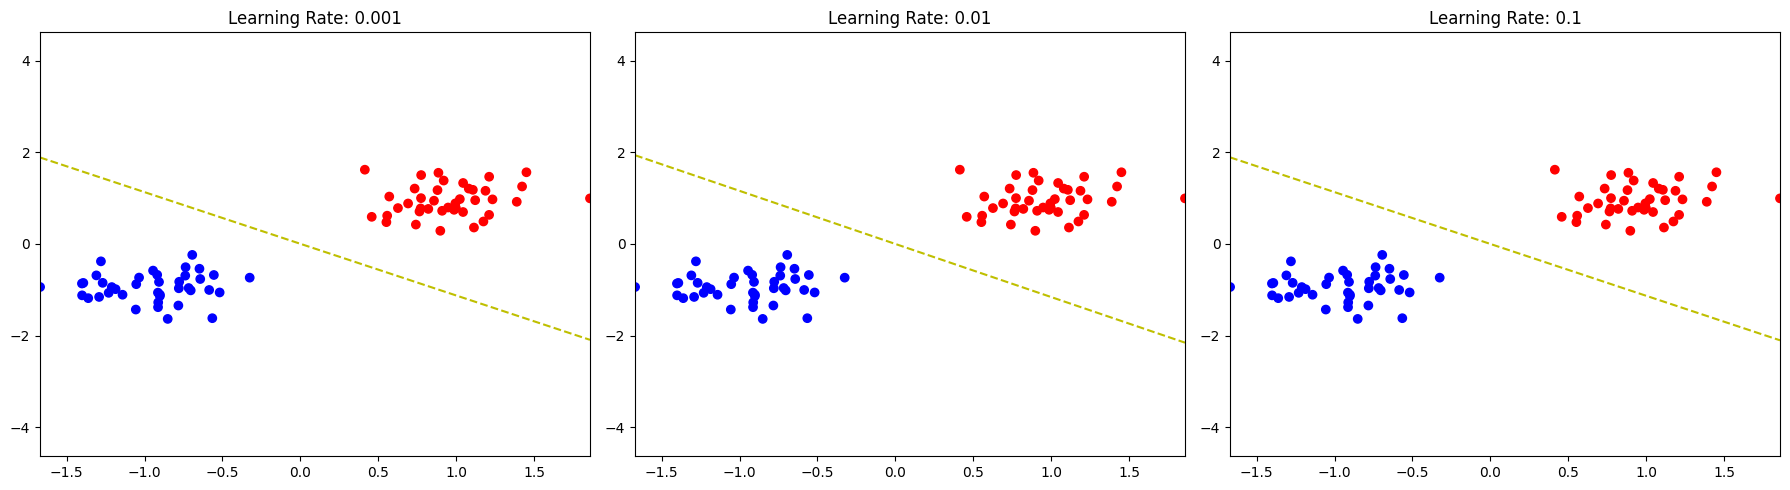

In [85]:
# Sensitivity to Learning Rate
def plot_learning_rate_sensitivity():
    """
    Visualize how the learning rate affects the decision boundary.
    """
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    learning_rates = [0.001, 0.01, 0.1]
    fig, axes = plt.subplots(1, len(learning_rates), figsize=(18, 5))

    for ax, lr in zip(axes, learning_rates):
        clf = SVM(learning_rate=lr, lambda_param=0.01, n_iters=1000)
        clf.fit(X_train, y_train)
        ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, cmap=plt.cm.bwr)
        x0_1 = np.amin(X_train[:, 0])
        x0_2 = np.amax(X_train[:, 0])
        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
        ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--', label="Decision Boundary")
        ax.set_title(f"Learning Rate: {lr}")
        ax.set_xlim([x0_1, x0_2])
        ax.set_ylim([np.amin(X_train[:, 1]) - 3, np.amax(X_train[:, 1]) + 3])

    plt.tight_layout()
    plt.show()

plot_learning_rate_sensitivity()


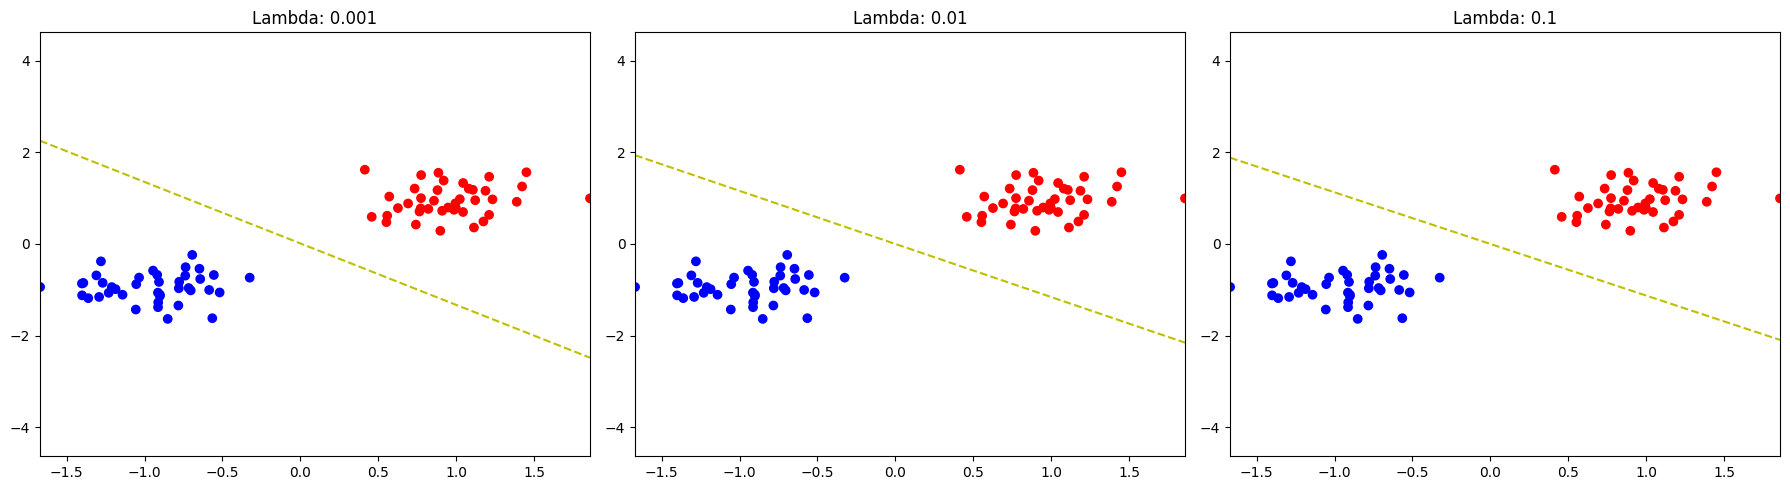

In [70]:
# Sensitivity to Regularization Parameter (Lambda)
def plot_regularization_sensitivity():
    """
    Visualize how the regularization parameter affects the decision boundary.
    """
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]
    lambda_values = [0.001, 0.01, 0.1]
    fig, axes = plt.subplots(1, len(lambda_values), figsize=(18, 5))

    for ax, lambda_param in zip(axes, lambda_values):
        clf = SVM(learning_rate=0.01, lambda_param=lambda_param, n_iters=1000)
        clf.fit(X_train, y_train)
        ax.scatter(X_train[:, 0], X_train[:, 1], marker='o', c=y_train, cmap=plt.cm.bwr)
        x0_1 = np.amin(X_train[:, 0])
        x0_2 = np.amax(X_train[:, 0])
        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)
        ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--', label="Decision Boundary")
        ax.set_title(f"Lambda: {lambda_param}")
        ax.set_xlim([x0_1, x0_2])
        ax.set_ylim([np.amin(X_train[:, 1]) - 3, np.amax(X_train[:, 1]) + 3])

    plt.tight_layout()
    plt.show()

plot_regularization_sensitivity()

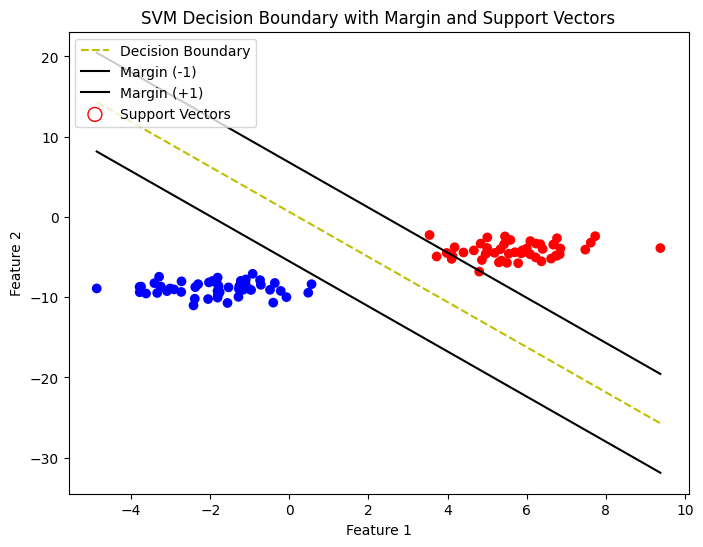

In [86]:
def plot_2d(X, y, model):
    """
    Plot the 2D scatter plot of data points and the decision boundary.
    """
    fig, ax = plt.subplots(figsize=(8, 6))

    # Scatter plot of the data points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, marker='o')

    # Define the range of values for plotting the decision boundary
    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    # Hyperplanes
    x1_1 = (-model.w[0] * x0_1 - model.b) / model.w[1]
    x1_2 = (-model.w[0] * x0_2 - model.b) / model.w[1]

    # Plot the decision boundary (hyperplane)
    ax.plot([x0_1, x0_2], [x1_1, x1_2], 'y--', label="Decision Boundary")

    # Margin lines
    x1_1_m = (-model.w[0] * x0_1 - model.b - 1) / model.w[1]
    x1_2_m = (-model.w[0] * x0_2 - model.b - 1) / model.w[1]

    x1_1_p = (-model.w[0] * x0_1 - model.b + 1) / model.w[1]
    x1_2_p = (-model.w[0] * x0_2 - model.b + 1) / model.w[1]

    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], 'k', label="Margin (-1)")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], 'k', label="Margin (+1)")

    # Highlight Support Vectors
    support_vectors = (y * (np.dot(X, model.w) - model.b) < 1)
    ax.scatter(X[support_vectors, 0], X[support_vectors, 1], s=100, facecolors='none', edgecolors='red', label="Support Vectors")

    # Set axis labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title("SVM Decision Boundary with Margin and Support Vectors")
    ax.legend(loc='upper left')
    plt.show()

# Now you can call this function with 2D data
plot_2d(X, y, clf)
